SGD Classifier Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96       983
           1       0.97      0.96      0.96      1152
           2       0.92      0.89      0.91       967
           3       0.90      0.86      0.88      1034
           4       0.93      0.89      0.91       906
           5       0.89      0.83      0.86       937
           6       0.95      0.94      0.94       961
           7       0.95      0.91      0.93      1055
           8       0.69      0.92      0.79       969
           9       0.91      0.88      0.89      1036

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000

Random Forest Classifier Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       983
           1       0.99      0.99      0.99      1152
           2       0

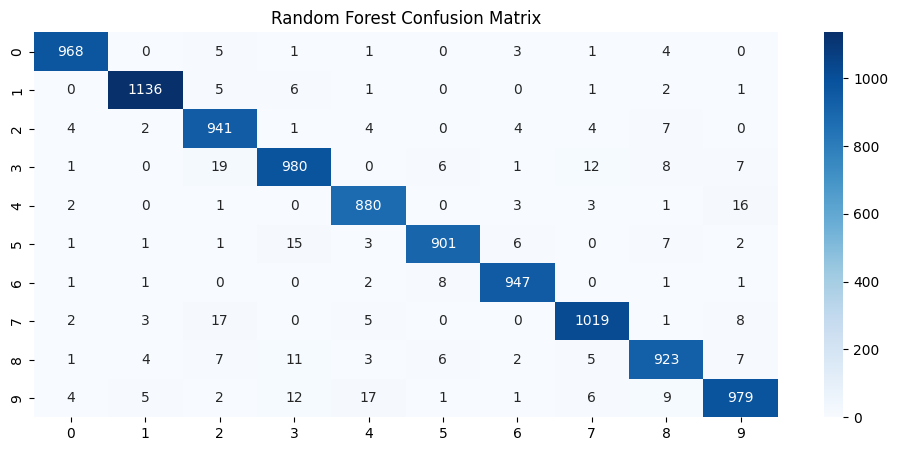

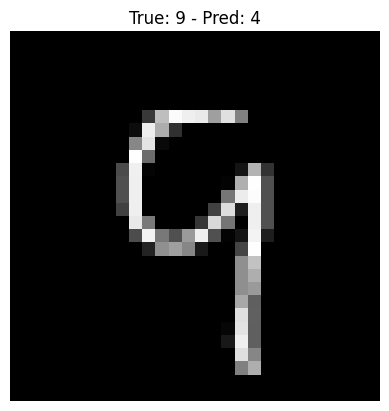

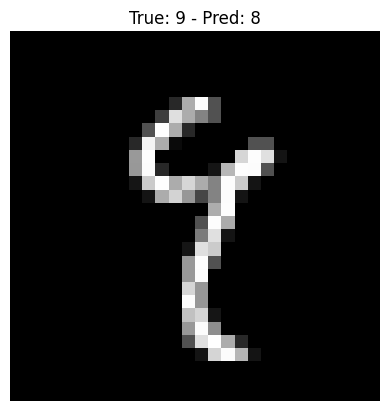

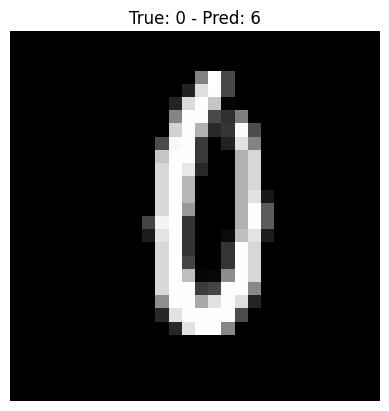

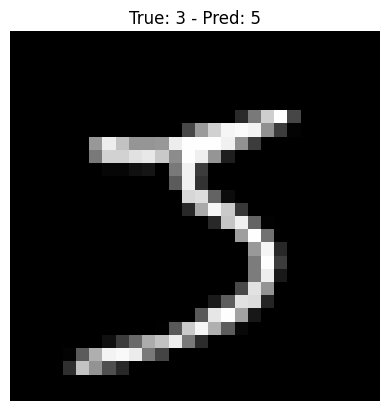

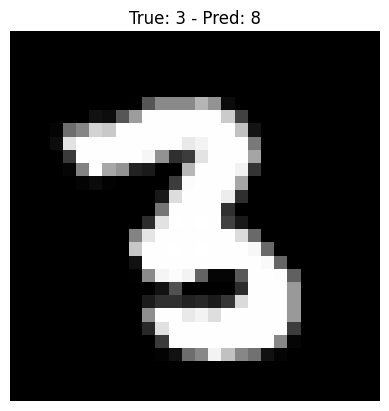

In [2]:
# ✅ Step 1: Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# ✅ Step 2: Load MNIST Dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist['data'], mnist['target'].astype(int)

# ✅ Step 3: Split Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)

# ✅ Step 4: Preprocessing - Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
X_test_scaled = scaler.transform(X_test.astype(np.float64))

# ✅ Step 5: Train Classifiers
sgd = SGDClassifier(loss='hinge', random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

sgd.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)  # RF doesn't need scaled input

# ✅ Step 6: Predictions
y_pred_sgd = sgd.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)

# ✅ Step 7: Evaluation
print("SGD Classifier Report:\n", classification_report(y_test, y_pred_sgd))
print("Random Forest Classifier Report:\n", classification_report(y_test, y_pred_rf))

# ✅ Step 8: Confusion Matrix
plt.figure(figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

# ✅ Step 9: Misclassified Images
mis = (y_test != y_pred_rf)
X_mis = X_test[mis]
y_mis = y_test[mis]
y_pred_mis = y_pred_rf[mis]

for i in range(5):
    plt.imshow(X_mis.iloc[i].values.reshape(28, 28), cmap="gray")
    plt.title(f"True: {y_mis.iloc[i]} - Pred: {y_pred_mis[i]}")
    plt.axis("off")
    plt.show()
